
Random Seed: 42

Generated Network:
– Input Features: 5 → Values: [4.64, 1.97, -6.88, -6.88, -8.84]
– Hidden Layers: 1
  • Layer 1: 4 neurons
– Output Layer: 1 neuron

Final Outputs:
– Sigmoid: [0.7]
– Tanh: [0.689]
– ReLU: [0.0]
– Leaky ReLU: [-0.057]


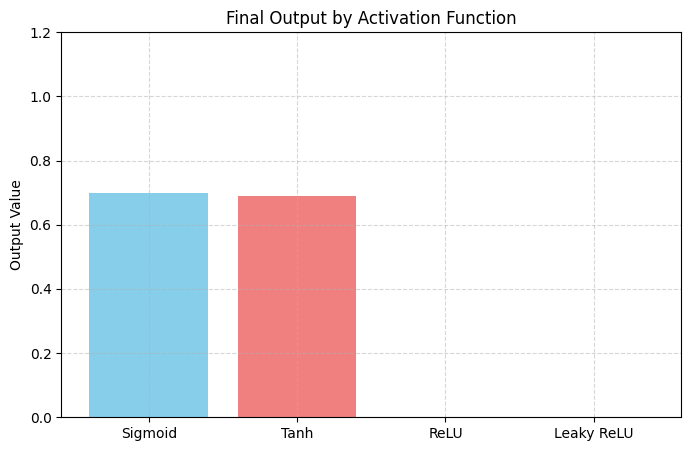

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.where(x > 0, x, 0.01 * x)

# Forward pass
def forward_pass(inputs, weights, biases, activation_fn):
    a = inputs
    for i in range(len(weights)):
        z = np.dot(weights[i], a) + biases[i]
        a = activation_fn(z)
    return a

# Generate random network structure
n_features = np.random.randint(3, 7)
n_hidden_layers = np.random.randint(1, 4)
neurons_per_layer = [np.random.randint(2, 6) for _ in range(n_hidden_layers)]
neurons_per_layer.append(1)  # Output layer

# Input values
inputs = np.round(np.random.uniform(-10, 10, size=n_features), 2)

# Weight and bias initialization
layer_sizes = [n_features] + neurons_per_layer
weights = []
biases = []

for i in range(len(layer_sizes) - 1):
    w = np.round(np.random.uniform(-1, 1, size=(layer_sizes[i + 1], layer_sizes[i])), 2)
    b = np.round(np.random.uniform(-1, 1, size=(layer_sizes[i + 1],)), 2)
    weights.append(w)
    biases.append(b)

# Activation functions dictionary
activations = {
    "Sigmoid": sigmoid,
    "Tanh": tanh,
    "ReLU": relu,
    "Leaky ReLU": leaky_relu
}

# Compute outputs
outputs = {}
for name, fn in activations.items():
    out = forward_pass(inputs, weights, biases, fn)
    outputs[name] = np.round(out[0], 3)  # Final scalar output

# Print network info
print(f"\nRandom Seed: 42")
print(f"\nGenerated Network:")
print(f"– Input Features: {n_features} → Values: {inputs.tolist()}")
print(f"– Hidden Layers: {n_hidden_layers}")
for i in range(n_hidden_layers):
    print(f"  • Layer {i+1}: {neurons_per_layer[i]} neurons")
print(f"– Output Layer: 1 neuron\n")

print("Final Outputs:")
for k, v in outputs.items():
    print(f"– {k}: [{v}]")

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(outputs.keys(), outputs.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title("Final Output by Activation Function")
plt.ylabel("Output Value")
plt.ylim(0, max(outputs.values()) + 0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
